In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

import plotly
import plotly.offline as pyo
import plotly.graph_objs as go


In [2]:
!dir

 O volume na unidade D � DATA
 O N�mero de S�rie do Volume � 681E-0D62

 Pasta de d:\Dropbox\GitHub\bootcamp_dsa_2021\src\notebooks

19/01/2021  11:50    <DIR>          .
19/01/2021  11:50    <DIR>          ..
18/01/2021  17:37           174.388 analise_covid.ipynb
19/01/2021  02:25         3.574.352 deaths_by_totalCases.html
19/01/2021  02:25         3.574.782 deaths_per_100k_inhabitants.html
19/01/2021  02:25         3.505.322 lineplot.html
19/01/2021  11:10            10.010 modelos_epidemiologicos.ipynb
19/01/2021  02:25         3.554.653 newDeaths.html
19/01/2021  02:25         3.592.374 newDeaths_100k.html
19/01/2021  15:22           735.766 new_notebook.ipynb
19/01/2021  02:25         3.587.128 testes_caso_confirmado.html
19/01/2021  02:25         3.576.068 tests_per_100k_inhabitants.html
              10 arquivo(s)     25.884.843 bytes
               2 pasta(s)   1.046.104.350.720 bytes dispon�veis


In [3]:

# dealing with local dataset
# df = pd.read_csv('../../data/cases-brazil-cities-time.csv.gz', compression='gzip', sep=',')
# df.head()

df_woca = pd.read_csv('../../data/cases-brazil-states.csv')
df_woca['date'] = pd.to_datetime(df_woca['date'])
df_woca['pop'] = ( df_woca['deaths'] / df_woca['deaths_per_100k_inhabitants'] )*100000 # pop em 100k hab
df_woca['newDeaths_100k'] = df_woca['newDeaths']/( df_woca['pop'] / 100000 ) # 

print(df_woca.info())
print(df_woca.shape)
df_woca.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8694 entries, 0 to 8693
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   epi_week                         8694 non-null   int64         
 1   date                             8694 non-null   datetime64[ns]
 2   country                          8694 non-null   object        
 3   state                            8694 non-null   object        
 4   city                             8694 non-null   object        
 5   newDeaths                        8694 non-null   int64         
 6   deaths                           8694 non-null   int64         
 7   newCases                         8694 non-null   int64         
 8   totalCases                       8694 non-null   int64         
 9   deathsMS                         8694 non-null   int64         
 10  totalCasesMS                     8694 non-null   int64      

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants,pop,newDeaths_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00047,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00047,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for state in df_woca['state'].unique():
    df_woca.loc[df_woca.query(f'state == "{state}" ').index , 'pop'] = df_woca.query(f'state == "{state}" ')['pop'].dropna().mean()

In [5]:

# dealing with local dataset
# df = pd.read_csv('../../data/cases-brazil-cities-time.csv.gz', compression='gzip', sep=',')
# df.head()

df_brio = pd.read_csv('../../data/caso_full.csv.gz')
df_brio['date'] = pd.to_datetime(df_brio['date'])

print(df_brio.info())
print(df_brio.shape)
df_brio.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410687 entries, 0 to 1410686
Data columns (total 18 columns):
 #   Column                                         Non-Null Count    Dtype         
---  ------                                         --------------    -----         
 0   city                                           1402313 non-null  object        
 1   city_ibge_code                                 1405306 non-null  float64       
 2   date                                           1410687 non-null  datetime64[ns]
 3   epidemiological_week                           1410687 non-null  int64         
 4   estimated_population                           1405306 non-null  float64       
 5   estimated_population_2019                      1405306 non-null  float64       
 6   is_last                                        1410687 non-null  bool          
 7   is_repeated                                    1410687 non-null  bool          
 8   last_available_confirmed        

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-25,0.0,0,1,city,SP,1,0
1,NaN,35.0,2020-02-25,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-25,0.0,0,1,state,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-26,0.0,0,2,city,SP,0,0
3,NaN,35.0,2020-02-26,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-26,0.0,0,2,state,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-27,0.0,0,3,city,SP,0,0


In [6]:

# dealing with local dataset
# df = pd.read_csv('../../data/cases-brazil-cities-time.csv.gz', compression='gzip', sep=',')
# df.head()

df_gov = pd.read_csv('../../data/HIST_PAINEL_COVIDBR_12jan2021.csv', sep=';')
df_gov['data'] = pd.to_datetime(df_gov['data'])

print(df_gov.info())
print(df_gov.shape)
df_gov.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1641617 entries, 0 to 1641616
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   regiao                  1641617 non-null  object        
 1   estado                  1641293 non-null  object        
 2   municipio               1626440 non-null  object        
 3   coduf                   1641617 non-null  int64         
 4   codmun                  1632572 non-null  float64       
 5   codRegiaoSaude          1626440 non-null  float64       
 6   nomeRegiaoSaude         1626440 non-null  object        
 7   data                    1641617 non-null  datetime64[ns]
 8   semanaEpi               1641617 non-null  int64         
 9   populacaoTCU2019        1635485 non-null  float64       
 10  casosAcumulado          1641617 non-null  int64         
 11  casosNovos              1641617 non-null  int64         
 12  obitosAcumulad

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN


In [7]:
df_woca['state'].unique()

array(['SP', 'TOTAL', 'RJ', 'BA', 'ES', 'DF', 'AL', 'MG', 'RS', 'GO',
       'PE', 'PR', 'RN', 'SC', 'AM', 'MS', 'SE', 'CE', 'AC', 'PA', 'PB',
       'TO', 'PI', 'AP', 'MA', 'MT', 'RO', 'RR'], dtype=object)

In [8]:
df_woca['testes_caso_confirmado'] = df_woca['tests_per_100k_inhabitants']/df_woca['totalCases_per_100k_inhabitants']

In [9]:
def get_plotly_lineplot_trace_object(x, y, name=''):
    # marker_dict = dict(size=12,
    #                 color ='rgb(51,204,153)',
    #                 symbol='pentagon',
    #                 line={'width':2}
                #   )
    # trace
    trace = go.Scatter(x=x, y=y, 
                       mode='lines', name=name)
                    #    marker=marker_dict)
    return trace

def get_state_tests_df(df, state_str, xvar, yvar, varname='state'):
    return df.query(f"{varname} == '{state_str}' ")[[xvar,yvar]]

def get_state_tests_df_gov(df, state_str, xvar, yvar, varname='state'):
    df_temp = df.query(f"{varname} == '{state_str}' ")
    df_temp = df_temp[ df_temp['codmun'].isna() ]
    return df_temp[[xvar,yvar]]
    
def get_xy_data_from_state_df(state_df):
    x=state_df.iloc[:,0]
    y=state_df.iloc[:,1]
    return (x,y)


In [10]:
# xvar = 'date'
# yvar = 'testes_caso_confirmado'#'tests_per_100k_inhabitants'

# traces = [get_plotly_lineplot_trace_object( *get_xy_data_from_state_df(get_state_tests_df(df_woca, state_str, xvar=xvar, yvar=yvar)), name=state_str) for state_str in ["TOTAL", "SP", "RS", "RJ", "AM", "MA", "CE","RN"]]
# data = [*traces]

# layout = go.Layout(title='COVID-BR',
#                   xaxis={'title':'Data'},
#                   yaxis=dict(title='# Testes por caso confirmado'),
#                   hovermode='closest')

# fig = go.Figure(data=data, layout=layout)

# pyo.plot(fig, filename='testes_caso_confirmado.html')

In [11]:

# state_str = 'CE'
# x_woca, y_woca = get_xy_data_from_state_df(get_state_tests_df(df_woca, state_str, xvar='date', yvar='totalCases')) 
# x_gov,  y_gov  = get_xy_data_from_state_df(get_state_tests_df_gov(df_gov,  state_str, xvar='data', yvar='casosAcumulado', varname='estado')) 


# data = [get_plotly_lineplot_trace_object(x_woca, y_woca, name='woca'), # https://github.com/wcota/covid19br/
#         get_plotly_lineplot_trace_object(x_gov,  y_gov,  name='gov'), # https://covid.saude.gov.br/
#         ] 

# fig = go.Figure(data=data)

# pyo.plot(fig, filename='lineplot.html')

In [12]:
# get_state_tests_df(df_gov,  'SP', xvar='data', yvar='casosAcumulado', varname='estado')

In [13]:
# df_gov

In [14]:
# plt.figure(figsize=(15,6))
# sns.lineplot(data=df_woca[['date','state','tests_per_100k_inhabitants']].query('state == "TOTAL"'), x='date',y='tests_per_100k_inhabitants')

In [15]:
# plt.figure(figsize=(15,6))
# sns.lineplot(data=df_woca[['date','state','tests_per_100k_inhabitants']].query('state in ["TOTAL", "SP", "RS", "RJ", "AM", "MA", "CE"]'), x='date',y='tests_per_100k_inhabitants', hue='state')

In [16]:
# xvar = 'date'
# yvar = 'tests_per_100k_inhabitants'#'tests_per_100k_inhabitants'

# traces = [get_plotly_lineplot_trace_object( *get_xy_data_from_state_df(get_state_tests_df(df_woca, state_str, xvar=xvar, yvar=yvar)), name=state_str) for state_str in ["TOTAL", "SP", "RS", "RJ", "AM", "MA", "CE","RN"]]
# data = [*traces]

# layout = go.Layout(title='COVID-BR',
#                   xaxis={'title':'Data'},
#                   yaxis=dict(title='Testes por 100k Hab'),
#                   hovermode='closest')

# fig = go.Figure(data=data, layout=layout)

# pyo.plot(fig, filename='tests_per_100k_inhabitants.html')

In [17]:
# xvar = 'date'
# yvar = 'deaths_per_100k_inhabitants'#'tests_per_100k_inhabitants'

# traces = [get_plotly_lineplot_trace_object( *get_xy_data_from_state_df(get_state_tests_df(df_woca, state_str, xvar=xvar, yvar=yvar)), name=state_str) for state_str in ["TOTAL", "SP", "RS", "RJ", "AM", "MA", "CE","RN"]]
# data = [*traces]

# layout = go.Layout(title='COVID-BR',
#                   xaxis={'title':'Data'},
#                   yaxis=dict(title='deaths_per_100k_inhabitants'),
#                   hovermode='closest')

# fig = go.Figure(data=data, layout=layout)

# pyo.plot(fig, filename='deaths_per_100k_inhabitants.html')

In [18]:
# xvar = 'date'
# yvar = 'deaths_by_totalCases'#'tests_per_100k_inhabitants'

# traces = [get_plotly_lineplot_trace_object( *get_xy_data_from_state_df(get_state_tests_df(df_woca, state_str, xvar=xvar, yvar=yvar)), name=state_str) for state_str in ["TOTAL", "SP", "RS", "RJ", "AM", "MA", "CE","RN"]]
# data = [*traces]

# layout = go.Layout(title='COVID-BR',
#                   xaxis={'title':'Data'},
#                   yaxis=dict(title='deaths_by_totalCases'),
#                   hovermode='closest')

# fig = go.Figure(data=data, layout=layout)

# pyo.plot(fig, filename='deaths_by_totalCases.html')

In [19]:
# xvar = 'date'
# yvar = 'newDeaths'#'tests_per_100k_inhabitants'

# traces = [get_plotly_lineplot_trace_object( *get_xy_data_from_state_df(get_state_tests_df(df_woca, state_str, xvar=xvar, yvar=yvar)), name=state_str) for state_str in ["TOTAL", "SP", "RS", "RJ", "AM", "MA", "CE","RN"]]
# data = [*traces]

# layout = go.Layout(title='COVID-BR',
#                   xaxis={'title':'Data'},
#                   yaxis=dict(title='newDeaths'),
#                   hovermode='closest')

# fig = go.Figure(data=data, layout=layout)

# pyo.plot(fig, filename='newDeaths.html')

In [20]:

# xvar = 'date'
# yvar = 'newDeaths_100k'#'tests_per_100k_inhabitants'

# traces = [get_plotly_lineplot_trace_object( *get_xy_data_from_state_df(get_state_tests_df(df_woca, state_str, xvar=xvar, yvar=yvar)), name=state_str) for state_str in ["TOTAL", "SP", "RS", "RJ", "AM", "MA", "CE","RN"]]
# data = [*traces]

# layout = go.Layout(title='COVID-BR',
#                   xaxis={'title':'Data'},
#                   yaxis=dict(title='newDeaths_100k'),
#                   hovermode='closest')

# fig = go.Figure(data=data, layout=layout)

# pyo.plot(fig, filename='newDeaths_100k.html')

In [21]:
# sns.lineplot(data = df_woca.query('state == "RJ"'),x='date' ,y='newCases')

dias de infecção (media): mean of inv 27.16611416324725 vs inv of mean 21.5735819037386 
coef medio de transmissão: 0.06445752177240363 
r0 medio : mean over mean 1.3905796252689637 mean from dist 1.9982745742164645


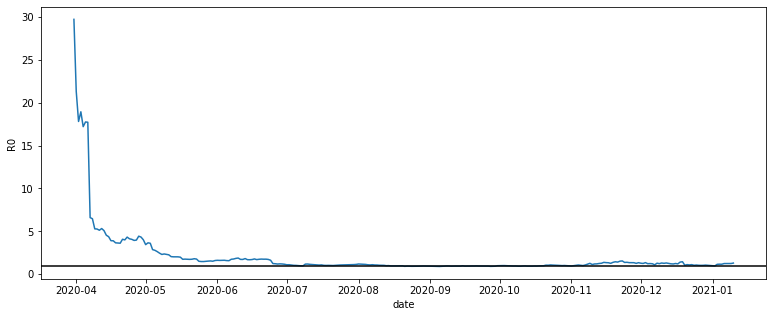

In [22]:
df_woca['N'] = df_woca['pop']

df_woca['R'] = df_woca['recovered']
df_woca['I'] = df_woca['totalCases']-df_woca['R']
df_woca['S'] = df_woca['pop'] - df_woca['I'] - df_woca['R']
df_woca['D'] = df_woca['deaths']


# df_temp = df_woca.melt(id_vars=['date','state'],value_vars=['S','I','R'])
# sns.lineplot(data =df_temp.query('state == "TOTAL"'),x='date' ,y='value', hue='variable')

estado = 'TOTAL'
df_temp = df_woca.set_index('date').sort_index().query(f'state=="{estado}"')[['pop','N','S','I','R','testes_caso_confirmado','tests_per_100k_inhabitants']]

df_temp['R_diff'] = df_temp['R'].diff(1)
df_temp['I_diff'] = df_temp['I'].diff(1)
df_temp['S_diff'] = df_temp['S'].diff(1)

# rolling mean
# df_temp = df_temp.rolling(window=14, center=True, win_type='gaussian').mean(std=10) #.dropna()

ws = 14
min_periods = ws

# df_temp = df_temp.rolling(window=ws, center=True, win_type='kaiser',min_periods=min_periods).mean(beta=4) #.dropna()
df_temp = df_temp.rolling(window=ws, min_periods=min_periods, center=True).mean()


# df_temp = df_temp[df_temp['S'].diff(1)<0]
# df_woca.set_index('date').sort_index().query('state == "TOTAL" ')


df_temp['gamma'] = df_temp['R_diff']/df_temp['I']
df_temp['beta']  = -df_temp['S_diff']/(df_temp['S']*df_temp['I']/df_temp['pop'])
df_temp['R0']    = (df_temp['beta']/df_temp['gamma'] )

# df_temp = df_temp.loc['2020-05-01':'2021-01-18']
# df_temp = df_temp.dropna()


gamma = df_temp['gamma'].replace([np.inf, -np.inf], np.nan).dropna()
Tinfec = (1/df_temp['gamma']).replace([np.inf, -np.inf], np.nan).dropna()
beta  = df_temp['beta'].replace([np.inf, -np.inf], np.nan).dropna()
R0_clean = df_temp['R0'].replace([np.inf, -np.inf], np.nan).dropna()

gamma_medio = gamma.mean()
Tinfec_medio = Tinfec.mean()
beta_medio = beta.mean()
R0_medio = R0_clean.mean()

# print(Tinfec.describe())
print(f'dias de infecção (media): mean of inv {Tinfec.mean()} vs inv of mean {1/gamma_medio} ')
print(f'coef medio de transmissão: {beta_medio} ')
print(f'r0 medio : mean over mean {beta_medio/gamma_medio} mean from dist {R0_medio}')

# sns.histplot(data=R0)
f, a = plt.subplots(1,1, figsize=(13,5))
sns.lineplot(data=df_temp,x=df_temp.index, y='R0', axes=a)
a.axhline(y=1,color='k')


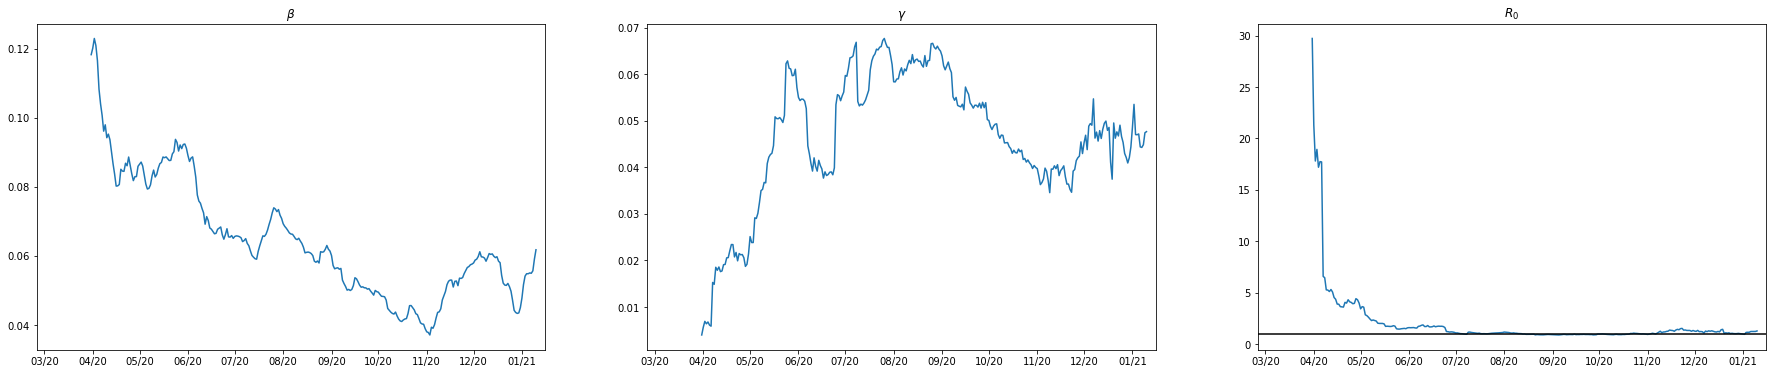

In [23]:
from matplotlib.dates import HourLocator, DateFormatter

f, a = plt.subplots(1,3, figsize=(31,6))

a[0].plot(df_temp['beta']), a[0].set_title(r"$ \beta $")
a[1].plot(df_temp['gamma']), a[1].set_title(r"$ \gamma $")
a[2].plot(df_temp['R0']), a[2].set_title(r"$ R_0 $")
a[2].axhline(y=1,color='k')


for i in range(len(a)):
    a[i].set_xlim([df_temp.index.min(),df_temp.index.max()])
    # a[i].set_xlim(['2020-09',df_temp.index.max()])
    a[i].xaxis.set_major_formatter(DateFormatter('%m/%y'))

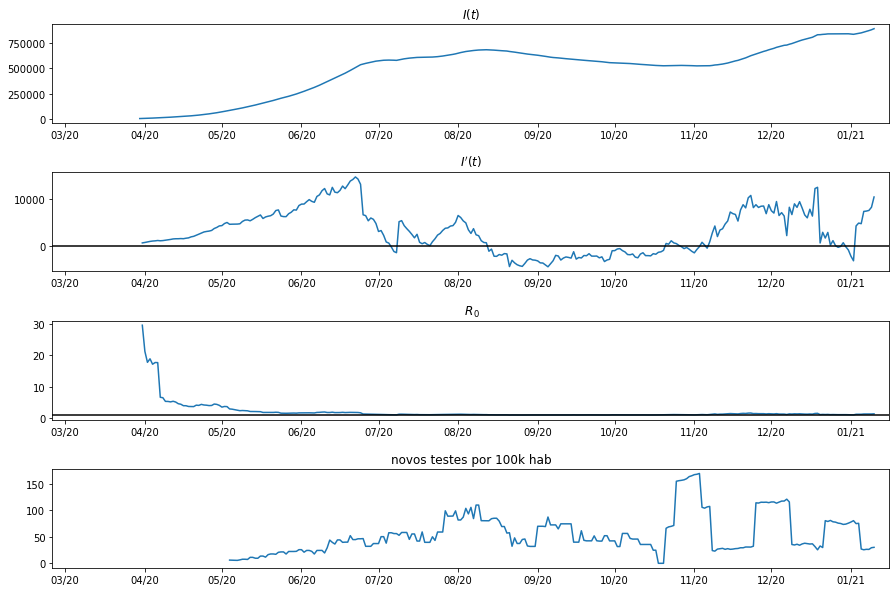

In [24]:
f, a = plt.subplots(4,1 , figsize=(15,10), gridspec_kw={'hspace':.5})

a[0].plot(df_temp['I']), 
a[0].set_title(r"$ I (t) $")

a[1].plot(df_temp['I_diff']), 
a[1].set_title(r"$ I^\prime (t) $")
a[1].axhline(y=0,color='k')

a[2].plot(df_temp['R0'])
a[2].set_title(r" $R_0$ ")
a[2].axhline(y=1,color='k')


a[3].plot(df_temp['tests_per_100k_inhabitants'].diff(1))
a[3].set_title(r"novos testes por 100k hab")

for i in range(len(a)):
    a[i].set_xlim([df_temp.index.min(),df_temp.index.max()])
    a[i].xaxis.set_major_formatter(DateFormatter('%m/%y'))
# a[0].plot(df_temp['S_diff']), a[0].set_title(r"$ S^\prime(t) $")
# a[0].plot(df_temp['S_diff']), a[0].set_title(r"$ S^\prime(t) $")

# a[1].plot(df_temp['I_diff']), a[1].set_title(r"$ I^\prime (t) $")
# a[2].plot(df_temp['R_diff']), a[2].set_title(r"$ R^\prime(t) $")

In [25]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

def moving_avg(X,Y,ws):
    Y = Y.rolling(window=ws, center=True).mean().dropna()
    X = X.rolling(window=ws, center=True).mean().dropna()
    return X,Y

def remove_outliers(X,Y,eps):
    q_low = Y.quantile(eps)
    q_hi  = Y.quantile(1-eps)
    filter_locs = (Y < q_hi) & (Y > q_low)

    if sum(filter_locs) > 2:
        Y = Y[filter_locs]
        X = X[filter_locs]
    return X, Y

def ols_reg(X,Y,const):
    if const:
        X= sm.add_constant(X)
    model = OLS(endog=Y, exog=X)
    results = model.fit()
    return results.params, results

def plot_ols_result(Y, ols_eq):
    f, a = plt.subplots(1,1 , figsize=(9,6), gridspec_kw={'hspace':.5})
    a.plot(Y, label=y_str)
    a.plot(ols_eq, label=x_str)
    a.legend()

def full_ols(x_str,y_str, const=True):
    Y = df_temp[y_str]
    X = df_temp[x_str]

    X, Y = moving_avg(X,Y,ws)
    X, Y  = remove_outliers(X,Y,eps)

    params, _ = ols_reg(X,Y,const)

    return (X, Y), params

In [26]:
df_woca['N'] = df_woca['pop']
df_woca['D'] = df_woca['deaths']
df_woca['R'] = df_woca['recovered']
df_woca['I'] = df_woca['totalCases']-df_woca['R']
df_woca['S'] = df_woca['pop']-df_woca['I']-df_woca['R']
df_woca['IS_div_N'] = df_woca['I']*df_woca['S']/df_woca['N']

In [27]:
from datetime import timedelta
from dateutil.relativedelta import relativedelta



In [28]:
# y_str = 'R_diff'
# x_str = 'I'

# Y = df_temp[y_str]
# X = df_temp[x_str]

# X, Y = moving_avg(X,Y,ws)
# X, Y  = remove_outliers(X,Y,eps)

# X, Y
# # params, _ = ols_reg(X,Y,const)

In [29]:
estado = 'SP'
ws = 14
min_periods = ws
stride_val_days, window_len_days = 7, 8*7
eps = 0.00001
const=False
dynamic_gamma=True


beta = 0.048187
gamma R = 0.042547, T_infec R=23.50
gamma D = 0.001243, T_infec D=804.40
T_infec  RD=22.84
r0: 1.1004248441628552


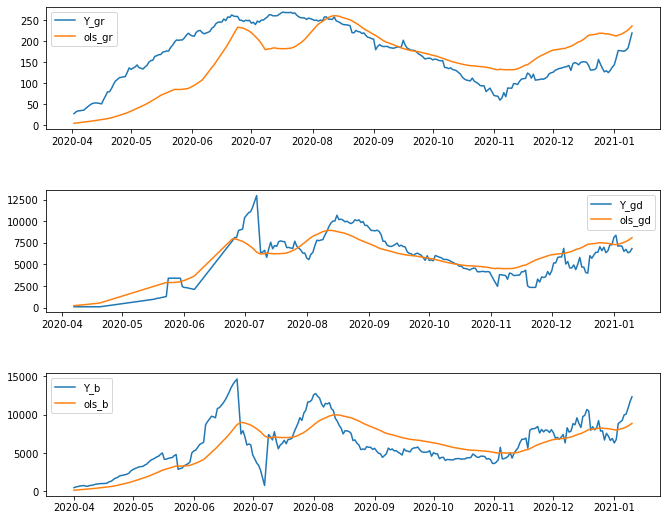

In [30]:
date_begin = '2020-03-01'
date_end   = '2021-02-01'

cols = ['N','S','I','R', 'D', 'IS_div_N']

df_temp = df_woca.set_index('date').sort_index().query(f'state=="{estado}"')[cols]

df_temp['D_diff'] = df_temp['D'].diff(1)
df_temp['R_diff'] = df_temp['R'].diff(1)
df_temp['I_diff'] = df_temp['I'].diff(1)
df_temp['S_diff'] = df_temp['S'].diff(1)

df_temp = df_temp.loc[date_begin:date_end]
df_temp = df_temp.dropna()

y_str = 'R_diff'
x_str = 'I'

(X, Y), params  = full_ols(x_str,y_str,const)
gamma_r   = params['I']
Y_gr = Y
const_gr = params['const'] if const else 0
ols_eq_gr = gamma_r*X+const_gr

y_str = 'D_diff'
x_str = 'I'
(X, Y), params  = full_ols(x_str,y_str,const)
gamma_d   = params['I']
Y_gd = Y
const_gd = params['const'] if const else 0
ols_eq_gd = gamma_d*X + const_gd


df_temp['I_diff_minus_ggI'] = df_temp['I_diff'] + (gamma_r+gamma_d)*df_temp['I']
y_str = 'I_diff_minus_ggI'
x_str = 'IS_div_N'
(X, Y), params = full_ols(x_str,y_str,const)
Y_b = Y
beta   = params['IS_div_N']
const_b  = params['const'] if const else 0
ols_eq_b = beta*X + const_b

r0t = beta/(gamma_r+gamma_d)
static_T_infec = 1/(gamma_r+gamma_d)

print(f'beta = {beta:.6f}')
print(f'gamma R = {gamma_r:.6f}, T_infec R={1/gamma_r:.2f}')
print(f'gamma D = {gamma_d:.6f}, T_infec D={1/gamma_d:.2f}')
print(f'T_infec  RD={static_T_infec:.2f}')
print(f'r0: {r0t}')

f, a = plt.subplots(3,1 , figsize=(11,9), gridspec_kw={'hspace':.5})
    
a[0].plot(Y_gd, label='Y_gr')
a[0].plot(ols_eq_gd, label='ols_gr')
a[0].legend()

a[1].plot(Y_gr, label='Y_gd')
a[1].plot(ols_eq_gr, label='ols_gd')
a[1].legend()

a[2].plot(Y_b, label='Y_b')
a[2].plot(ols_eq_b, label='ols_b')
a[2].legend()

# a[2].plot(Y_r, label='Y_r')
# a[2].plot(ols_eq_r, label='ols_r')
# a[2].legend()

In [31]:
betas = []
r0s = []
r0s_static_gamma = []
T_infec_rds = []

date_begin = '2020-03-01'
while pd.to_datetime(date_begin) < (pd.to_datetime('2021-01-15') - relativedelta(days=window_len_days)):
    date_begin = (pd.to_datetime(date_begin)  + relativedelta(days=stride_val_days))
    date_end_ts = (pd.to_datetime(date_begin) + relativedelta(days=window_len_days))
    date_end    = date_end_ts.strftime('%Y-%m-%d')  
    # date_begin = '2020-03-01'
    # date_end   = '2021-02-01'

    cols = ['N','S','I','R', 'D', 'IS_div_N']

    df_temp = df_woca.set_index('date').sort_index().query(f'state=="{estado}"')[cols]

    df_temp['D_diff'] = df_temp['D'].diff(1)
    df_temp['R_diff'] = df_temp['R'].diff(1)
    df_temp['I_diff'] = df_temp['I'].diff(1)
    df_temp['S_diff'] = df_temp['S'].diff(1)

    df_temp = df_temp.loc[date_begin:date_end]
    df_temp = df_temp.dropna()

    if len(df_temp)<ws:
        continue

    y_str = 'R_diff'
    x_str = 'I'

    if dynamic_gamma:
        (X, Y), params  = full_ols(x_str,y_str,const)
        gamma_r   = params['I']

        y_str = 'D_diff'
        x_str = 'I'
        (X, Y), params  = full_ols(x_str,y_str,const)
        gamma_d   = params['I']


    df_temp['I_diff_minus_ggI'] = df_temp['I_diff'] + (gamma_r+gamma_d)*df_temp['I']
    y_str = 'I_diff_minus_ggI'
    x_str = 'IS_div_N'
    (X, Y), params = full_ols(x_str,y_str,const)
    beta   = params['IS_div_N']

    date_avg = pd.to_datetime(date_end) - (pd.to_datetime(date_end) - pd.to_datetime(date_begin) )/2

    r0t_static_gamma =  beta*static_T_infec

    r0t = beta/(gamma_r+gamma_d)

    T_infec_rds.append((date_avg,1/(gamma_r+gamma_d)))
    betas.append((date_avg,beta))
    r0s.append((date_avg,r0t))
    r0s_static_gamma.append((date_avg,r0t_static_gamma))

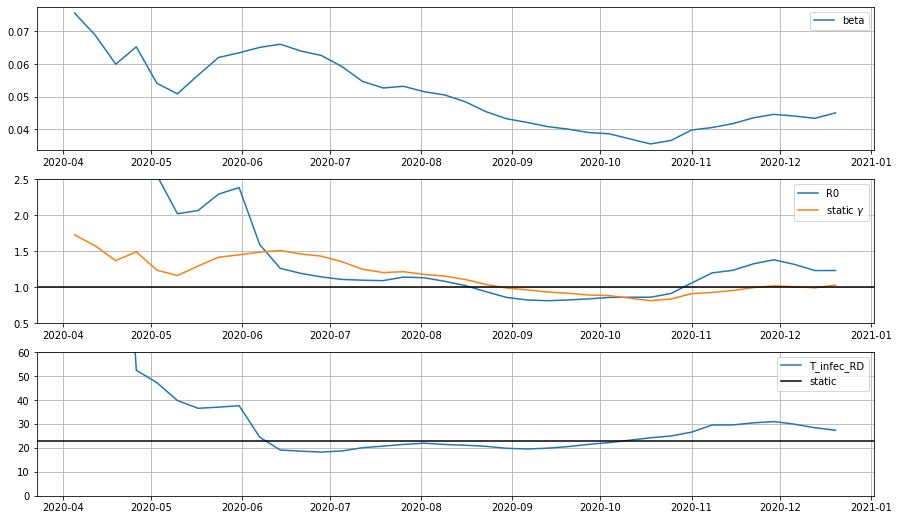

In [32]:
f, a = plt.subplots(3,1, figsize=(15,9))

a[0].plot(*list(zip(*betas)),label='beta')
a[0].legend()
a[0].grid()

a[1].plot(*list(zip(*r0s)),label='R0')
a[1].plot(*list(zip(*r0s_static_gamma)),label=r'static $\gamma$')
a[1].legend()
a[1].axhline(y=1,color='k')
a[1].set_ylim([.5,2.5])
a[1].grid()

_, y = list(zip(*T_infec_rds))
a[2].plot(*list(zip(*T_infec_rds)),label='T_infec_RD')
a[2].axhline(y=static_T_infec,color='k',label='static')
a[2].legend()
a[2].set_ylim([0,min(60,max(y))])
a[2].grid()


In [33]:
# # SIR Model

# y_str = 'I_diff'
# x_str = ['IS_div_N','I']

# (X, Y), params  = full_ols(x_str,y_str, const=const)

# beta  = params['IS_div_N']
# gamma = -params['I']
# const = params['const'] if const else 0

# ols_eq = beta*X.iloc[:,0]-gamma*X.iloc[:,1] + const
# plot_ols_result(Y, ols_eq)

# print(f'beta={beta}')
# print(f'gamma={gamma}')
# print(f'Ro={beta/gamma}')

In [34]:
# df_temp['I_diff_minus_gI'] = df_temp['I_diff'] + gamma*df_temp['I']

# y_str = 'I_diff_minus_gI'
# x_str = 'IS_div_N'

# (X, Y), params = full_ols(x_str,y_str)

# beta   = params['IS_div_N']
# const  = params['const']

# ols_eq = beta*X + const
# plot_ols_result(Y, ols_eq)

# print(f'beta={beta}')

# print(f'r0: {beta/gamma}')

In [35]:
# print(f'beta = {beta:.6f}')
# print(f'gamma R = {gamma_r:.6f}, T_infec R={1/gamma_r:.2f}')
# print(f'gamma D = {gamma_d:.6f}, T_infec D={1/gamma_d:.2f}')
# print(f'T_infec  RD={static_T_infec:.2f}')
# print(f'r0: {r0t}')